<a href="https://colab.research.google.com/github/SebastienBienfait/L2C-Data-managment/blob/main/Pandas/Projects/Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using numpy to look for a correlation between time data and sea level rise
---

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

For this exercise:
*  import the pandas library
*  import the numpy library
*  read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)
*  use df.head() and df.info() to inspect the data and the column data types



In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats



url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv"
df = pd.read_csv(url)
display(df)
display(df.info())
display(df.columns)

def test_null(df):
  for i in df.columns:
    if df[i].isnull().values.any() == True:
      print(i,"has",df[i].isnull().values.sum() ," null values")
    else:
      print(i, "has no null values")
test_null(df)
print()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


None

Index(['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound',
       'Upper Error Bound', 'NOAA Adjusted Sea Level'],
      dtype='object')

Year has no null values
CSIRO Adjusted Sea Level has no null values
Lower Error Bound has no null values
Upper Error Bound has no null values
NOAA Adjusted Sea Level has 113  null values
133


### Then
---
1.  Calculate some statistics on the level array, eg:
*  mean
*  standard deviation
*  total 

2.  Use the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display:

*  the year with the biggest rise in level
*  the year with the lowest rise in level

*(**Hint**:  to do this you can use a new numpy function np.where() )*
 ```
np.where(array == value_to_find)
```
*There is some reference material [here](https://thispointer.com/find-the-index-of-a-value-in-numpy-array/)*

**Note**: ```np.where(...)``` will return a tuple containing all indexes where that value was found.  You can print all, or you can print the first value (it is likely that there will only be one in this case) using [0][0].  *With the correct code you should get an answer of 2012*


3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.  (*Expected output:  0.98 when rounded to 2 decimal places*)

Average sea level change per year:  3.6503408118805987
Standard deviation of sea level change:  2.4856919703839053
Total change over  134  years:  489.1456687920001



Year with the highest sea level increase:  2012
Year with the lowest sea level increase:  1882



Pearson correlation of year to sea level rise: 
 [[1.   0.98]
 [0.98 1.  ]]


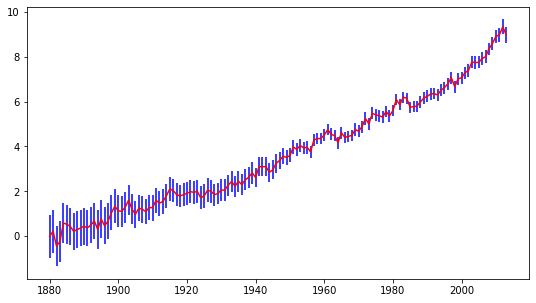

In [85]:

into_array_fl = lambda x: df[x].to_numpy()
into_array_int = lambda x: df[x].to_numpy()

arr_year = into_array_int("Year")
arr_cirso_level = into_array_fl("CSIRO Adjusted Sea Level")
arr_lower_err = into_array_fl("Lower Error Bound")
arr_upper_err = into_array_fl("Upper Error Bound")
arr_noaa_level = into_array_fl("NOAA Adjusted Sea Level")



def basic_stats(df):
  sea_mean_criso = df["CSIRO Adjusted Sea Level"].mean()
  sea_std_criso = df["CSIRO Adjusted Sea Level"].std()
  sea_sum_criso = df["CSIRO Adjusted Sea Level"].sum()
  print("Average sea level change per year: ", sea_mean_criso)
  print("Standard deviation of sea level change: ", sea_std_criso)
  print("Total change over ", df.index.max()+1," years: ", sea_sum_criso)

  print("\n\n")
  highest_change_year = df["Year"].iloc[ np.where(arr_cirso_level == arr_cirso_level.max())[0][0] ]
  lowest_change_year = df["Year"].iloc[ np.where(arr_cirso_level == arr_cirso_level.min())[0][0] ]
  print("Year with the highest sea level increase: ", highest_change_year) 
  print("Year with the lowest sea level increase: ", lowest_change_year) 

  print("\n\n")
  corr_sea_year = np.corrcoef(arr_year, arr_cirso_level)
  print("Pearson correlation of year to sea level rise: \n", np.round(corr_sea_year, 2)) #np.round() is needed rather than just round() for ndarray

basic_stats(df)

def plots():

  abs_low_err = arr_cirso_level - arr_lower_err
  abs_up_err = arr_upper_err - arr_cirso_level

  fig = plt.figure( figsize = (9,5) )
  plt.errorbar(arr_year, arr_cirso_level, yerr = [abs_low_err,abs_up_err], ecolor = "blue", color="red")
  plt.show()
plots()

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: 

## What caused you the most difficulty?

Your answer: 